## This Notebook - Goals - FOR EDINA

**What?:**
- R notebook demonstrating a typical data cleaning process
- Use of health data

**Who?:**
- Data Science and statistics students and academics 
- Anyone dealing with data

**Why?:**
- Demonstrate a notebook in a non-python language

**Noteable features to exploit:**
- R notebook
- Visualisation in R
- Sequential steps

**How?:**
- Use of R notebook in wide ranging application

<hr>

<div class="alert alert-info">
Rreferences:
    
[tutorial](https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce)

[walk through by the same person](https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Top_Python_Libraries_Used_In_Data%C2%A0Science.ipynb)

[EDA book](https://r4ds.had.co.nz/exploratory-data-analysis.html)
</div>

# Data cleaning and Exploratory Data Analysis (EDA) using R

Quick run through of how to use R clean data and simultaneously do informal EDA.

Aimed at people with some background in data science but not necessarily familiar with R or R notebooks.

[Quite nice pdf](https://cran.r-project.org/doc/contrib/de_Jonge+van_der_Loo-Introduction_to_data_cleaning_with_R.pdf) about how data cleaning in R works.

Broadly speaking, "data cleaning" refers to the processing necessary to get from the data at time of download, all the way to data you can actually use (model, predict, the fun stuff). This can be broken down to the following stages:
- Raw data to technically correct
- Technically correct to consistent

<i><b>Note:</b> EDA and data cleaning are different things, but they should be done together, iteratively. The more the data is explored, the better the cleaning will be!</i>

<hr>

# Acquiring data

R comes with datasets [built in](https://www.rdocumentation.org/packages/datasets/versions/3.6.2) which is useful when you're learning new concepts.

Of course you can also import and export your own data. Data can be found online on websites like [kaggle](https://www.kaggle.com) or by web scraping (or many other sources).

In this tutorial, a csv file from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) (open license) which is about breast cancer. 

First, load the data into a data frame. The variable name used is <code>raw_cervical</code> so that each stage of data cleaning can be reused if desired, like a checkpoint.

In [1]:
library(readr)

In [2]:
raw_cervical = readr::read_csv("data/cervical_data.csv")

Warning message:
“Missing column names filled in: 'X33' [33]”Parsed with column specification:
cols(
  .default = col_double(),
  diagnosis = col_character(),
  X33 = col_character()
)
See spec(...) for full column specifications.
Warning message:
“569 parsing failures.
row col   expected     actual                     file
  1  -- 33 columns 32 columns 'data/cervical_data.csv'
  2  -- 33 columns 32 columns 'data/cervical_data.csv'
  3  -- 33 columns 32 columns 'data/cervical_data.csv'
  4  -- 33 columns 32 columns 'data/cervical_data.csv'
  5  -- 33 columns 32 columns 'data/cervical_data.csv'
... ... .......... .......... ........................
See problems(...) for more details.
”

In [3]:
# wholly unnecessary but I keep forgetting the syntax
#write.csv(raw_cervical, "data/raw_data.csv")

Warning box, useful! R tries to inform the reader that there's something strange about the way the data frame is organised. Time to investigate...

In [4]:
# print a few lines that show what the warning describes
# notice expected vs actual differ in number of columns in data
head(problems(raw_cervical))

row,col,expected,actual,file
<int>,<chr>,<chr>,<chr>,<chr>
1,NA,33 columns,32 columns,'data/cervical_data.csv'
2,NA,33 columns,32 columns,'data/cervical_data.csv'
3,NA,33 columns,32 columns,'data/cervical_data.csv'
4,NA,33 columns,32 columns,'data/cervical_data.csv'
5,NA,33 columns,32 columns,'data/cervical_data.csv'
6,NA,33 columns,32 columns,'data/cervical_data.csv'


Looks like theres a discrepancy between the number of variables in the header and the number on each row of data. Time to do a little digging...

Look at the first couple of rows using <code>head()</code>

In [5]:
head(raw_cervical)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,X33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


In [6]:
colnames(raw_cervical)

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X33"

Glance over the column names, they all look consistent except for the last column "X33". More on this below.

Also print out number of rows and columns.

In [7]:
nrow(raw_cervical)
ncol(raw_cervical)

[1] 569

[1] 33

Even from these few cells, we have a lot more information than we did to begin with!

There are 569 samples, and 33 columns.

R has a really easy typing system compared to other languages. If you're a programmer already, class information might be informative. For example, there are some differences between data.frame and data.table.

If that sounds confusing, don't worry. The subject of data types can (mercifully) be mostly ignored.

Print out all the column names, check for anything odd looking...

In [8]:
class(raw_cervical)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

summary function can be used to get an idea of what is going on in a column (or actually a whole data frame but frankly its very ugly and I couldn't bring myself to print it here).

In [9]:
summary(raw_cervical$radius_mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.981  11.700  13.370  14.127  15.780  28.110 

In [10]:
## HISTOGRAMS??

## Using what's given

Above, there are a range of tools used to examine what is present in the data. Additional context can (and should) be added by reading the author's description (available [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)) of the data. 

Key information given about the data:

Context:
- features computed from image of a [fine needle aspirate](https://en.wikipedia.org/wiki/Fine-needle_aspiration) of a breast mass.
- features describe characteristics of cell nuceli in image
- 569 instances
- 32 attributes
- class distribution: 357 benign, 212 malignant
- no missing values

Attributes:
- ID in field 1
- predicting field 2, diagnosis - B=benign, M=malignant
- columns 3-32 contain the mean, standard error and "worst"/largest values of 10 different features. Where "worst" is mean of three largest values. 
- The 10 features are:
    - radius (mean distance from center to perimeter)
    - texture (standard deviation of grey-scale image values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness $\frac{{perimeter}^2}{area - 1.0}$
    - concavity (severity of concave portions of contour)
    - number of concave portions of contour
    - symmetry
    - fractal dimension $({coastline approximation}) - 1$
- Columns 3-32 are organised as follows:
    - 3-12: mean for each feature
    - 13-22: standard error for each feature
    - 23-32: "worst" value for each feature

<hr>

# Cleaning - Raw data to technically correct data

In essence, the getting the data to be "technically correct" involves identifying errors and inconsistencies in your data. The names, types and labels in the data need to make sense. luckily, this dataset is not too messy, but if it were, this step would ensure that R could access the data so that we can do more with it!

For example, if a height variable is stored as a string "1", this step would involve ensuring that R reads the value as a number, not a string of characters.

The goal of this step:
- the data is stored in a data.frame
- the columns of the data.frame are suitable
- each column uses an appropriate type to represent the values in it.
    - numeric data stored as <code>numeric/integer</code>
    - text data stored as <code>character</code> (for single characters and strings)
    - categorical data stored as <code>factor/ordered</code>
    - true/false data stored as <code>logical</code>
    
Steps to reach the goal:
- removing unused/irrelevant columns/rows / cols with 0 variance
- renaming variables for consistency and meaning
- encode missing values appropriately (if required)
- remove duplicates (if this doesnt cause loss of information)
- fix dates (common bugbear)
- fix strings (another common bugbear)
- recoding vectors (eg: use 0 and 1 instead of yes/no)

### Irrelevant columns/rows and cols with 0 variance

Time to revisit the weird 33rd column from earlier.

By checking the description of the data, as well as other people's comments online on [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data) it seems like column 33 shouldn't be there, and got read in by mistake. 

<b>Why did this happen?</b><br> By opening the csv file (just click on the file name in Noteable) I can see that the first line (header) ends with a comma, meaning that its still trying to read another heading and thinks there are 32 columns.

Seems safe to get rid of it, since the mistake is understood and confirmed by others. Removing the **irrelevant column**:

In [11]:
# the last column of the data (will print many NA's)
#raw_cervical$X33

In [12]:
# remove col 33, X33 (meaningless)
nas_cervical <- raw_cervical[-33]

In [13]:
# this is the last column now
#nas_cervical[32]

Great! Just got rid of this unnecessary column. Bear in mind that the data frame without NA's is stored in the <code>nas_cervical</code> variable, the <code>raw_cervical</code> is left as it was. From now on, use the <code>nas_cervical</code> data frame!

The original data description claims that there is no missing data at all in the dataset. Hopefully, that's the case now. To double check:

In [14]:
# prints nothing because none found!
# apply is used to check every column (dimension 2) for nas
apply(is.na(nas_cervical),2,which)

integer(0)

In [15]:
# if ran on the raw data (with NA values)
# by dimension 1 (rows)
# prints 33 for each line (since each line has an NA is position 33)

#apply(is.na(raw_cervical),1,which)

In [16]:
# same sort of idea for NULL values
# which(is.null(nas_cervical))

It can also sometimes be useful to think about infinity/NaN (not a number) values in the data. This is just an extension of what has already been done here, follows the same idea.

Sometimes, the purpose of data cleaning is to get it ready to answer a specific question about the variables. In these cases, it is sometimes appropriate to remove columns that are unrelated to the question. 

Sometimes, questions may only relate to a certain type of sample. For example, the question may relate to only individuals that had a diagnosis B=benign. In those cases, it may be sensible to remove rows for which that condition does not apply.

Since the purpose here is to understand the data, no rows or columns need to be deleted on this basis.

can remove empty rows and columns using remove_empty() in janitor package.

Columns with 0 variance? Are basically not very informative. If the variable changes nothing, its completely constant, why should it bulk up the data?

In [17]:
### COLS WITH 0 VARIANCE, only numerical
num_cervical <- nas_cervical[-2]
which(apply(num_cervical,2, var)==0)

named integer(0)

see also remove_constant() from janitor package to remove 0 variance columns from data.

### Encode missing values

There are none, can check. actually did check hmmm maybe reorder this.

Something about looking for NaN values and magic values, turning them into sensibly encoded NA.

### Variable names

The variable names are pretty sensible already:

In [18]:
# read column names
colnames(raw_cervical) # NAs? use updated version?

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X33"

if the variable names were rubbish, could use janitor package with clean_names().

### Duplicates

R will reduce down to unique with one function, 2 functions in base r which is nice.

Also note about removing duplicates. eg: if id is different but everything else the same?

In [19]:
# see also:
# duplicated() # identify duplicated elements
# unique() # extract unique elements
anyDuplicated(nas_cervical)

[1] 0

[anyDuplicated()](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/duplicated) returns 0, so no duplicate rows in data. easy. If there were, [unique()](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/unique) could be used to reduce the data frame.

See also [distinct()](https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/distinct) which seems to basically do the same thing but also removes the duplicates?? part of dplyr though which i think is loaded but ???

Can use 
<code>unique_df = unique(df)</code> - base r

Alternatively dplyr from tidyverse, can then pipe with distinct().

### Fix classes of each column - recode factors

common activities here include:
- checking if there are dates that are inevitably wrongly input can be fixed somehow
- fix strings to make sense because I guarantee they do not right now
- in that vein also recode categorical data to usable factors maybe numbers maybe booleans not sure will get back to you

Because R is a very questionable language, 2 main ways to retrieve class information:

In [20]:
# get class for each column
#lapply(nas_cervical,class)

In [21]:
# "compactly" display structure of object
#str(nas_cervical)

In [22]:
# look at first 20 values in column
head(nas_cervical$diagnosis, 20)


[1] "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M"
[20] "B"

In [23]:
# forces numeric 0 or 1 for values
nas_cervical$diagnosis <- gsub('M', "1", nas_cervical$diagnosis)
nas_cervical$diagnosis <- gsub('B', "0", nas_cervical$diagnosis)
nas_cervical$diagnosis <- as.numeric(nas_cervical$diagnosis)
# print first 20 values of column
head(nas_cervical$diagnosis, 20)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

Note: when you do something like this, make sure its clear to the reader of your work what has been done. 1 and 0 means nothing out of context, but as the person writing the code, you understand that 1 represents M in the original data, and 0 represents B.

### Dates and strings

Common problem to have. Not in this dataset, but you should check it. its horrible. best of luck. check lubridate package.

<hr>

# Cleaning - Technically correct data to consistent data

Just because the data is technically correct doesn't mean it makes sense. This is another reason why context is important.

For data to be consistent, it should be ready for inference.

Goal for this step:
- Data is stored in a suitable data frame, ready for inference!

Steps to reach the goal:
- variable constraints addressed (can age=-35?)
- missing values - addressing strategies to get the most from data with missing values
- dealing with outliers

### Variable Constraints

Can someone's age be -35?

Can someone be married, divorced, single and pregnant all at the same time?

These are the sorts of questions to ask at this stage.

This step is very subject specific. This absolutely requires subject knowledge. As the data analyist, it can be helpful to ask people in that discipline if the values make sense. Here, that would be a bold move. So this time, escape.

This step isnt included in this guide because its really involved and this data is quite well documented. Generally speaking though, this is a vital step in ensuring that variables are correctly labelled and contain useful information that actually makes sense. Correcting variable constraint violations is an art - not to be taken lightly.

Checking out the [editrules]() package is a good place to start. In particular, look at the <code>editset()</code> and <code>violatedEdits()</code> functions.

### Processing NA values appropriately

The last step involved ensuring that any missing values were stored as NA (as opposed to magic encodings that don't make sense. If looking at variable constraints highlighted more possible NAs, can go back now and check. Once youre happy that NA values are recorded as such, can move on to actually dealing with them!

Many different ways to deal with outliers (again, context dependant). May wish to remove all rows with missing values, remove irrlevant variables then remove rows with missing values, do something fancier...

Not addressing here because too involved, but libraries [naniar]() and [knitr]() provide useful starting point to visualise missing data.

### Outliers

Outliers:
2 steps. Identify and then treat. Not as simple as removal. Why not? you're messing with the data. Before, we were changing the way the data was represented. Now we're talking about meaningfully changing what is happening in the data. This is a delicate operation. 

<b>What actually is an outlier?</b><br>
An unusual bit of data. "Unusual" is (obviously) quite a context sensitive term. The idea of an outlier *at all* depends on the data that you have. So don't take this lightly. And don't blame me if this is all irrelevant to you.

One way to find outliers:<br>
Use boxplots. Here look for outliers in the radius mean variable:

[1] 25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
[13] 23.09 24.63

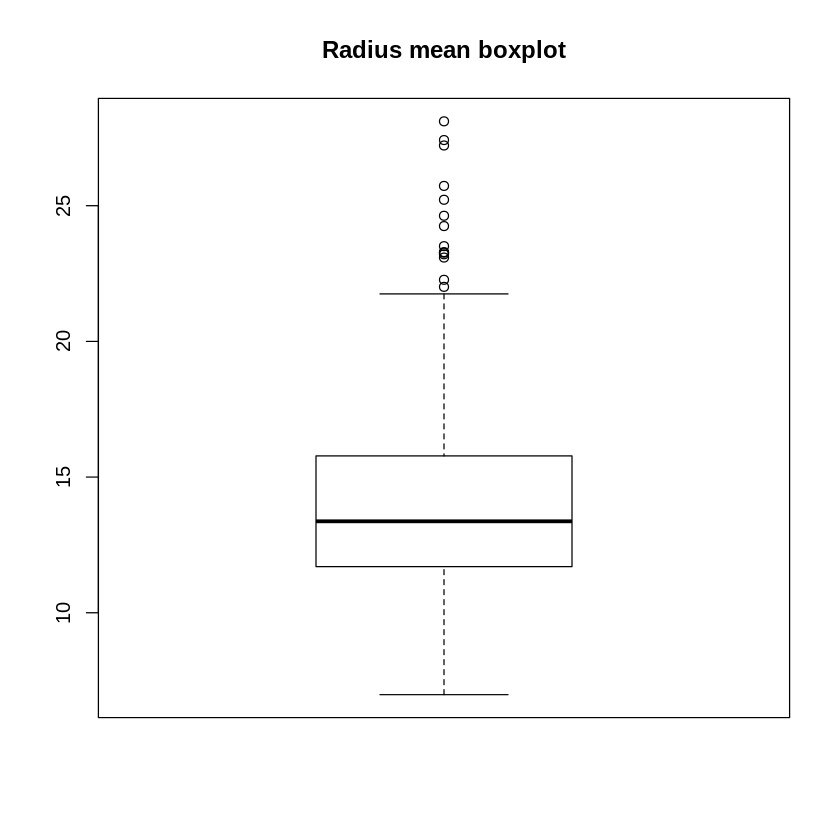

In [24]:
# find outlier points for the radius_mean variable in the data.
# this line prints the values of such points
boxplot.stats(nas_cervical$radius_mean)$out

boxplot(nas_cervical$radius_mean, main="Radius mean boxplot")

Looks like there are outliers above the upper IQR accepted range. We could treat these as outliers. If we wanted to. But there are quite a lot...so...don't. Also, the original paper for this data commented on outliers (there are none) and their word is better than IQR test.

If this needs to be confirmed in the data, could interrogate data a bit by setting against the target variable.

In [25]:
library(dplyr) # need for correct filter()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
## separate data out by diagnosis
melignant <- dplyr::filter(nas_cervical, diagnosis==1)
nrow(melignant)

[1] 212

[1] 27.22 28.11 27.42

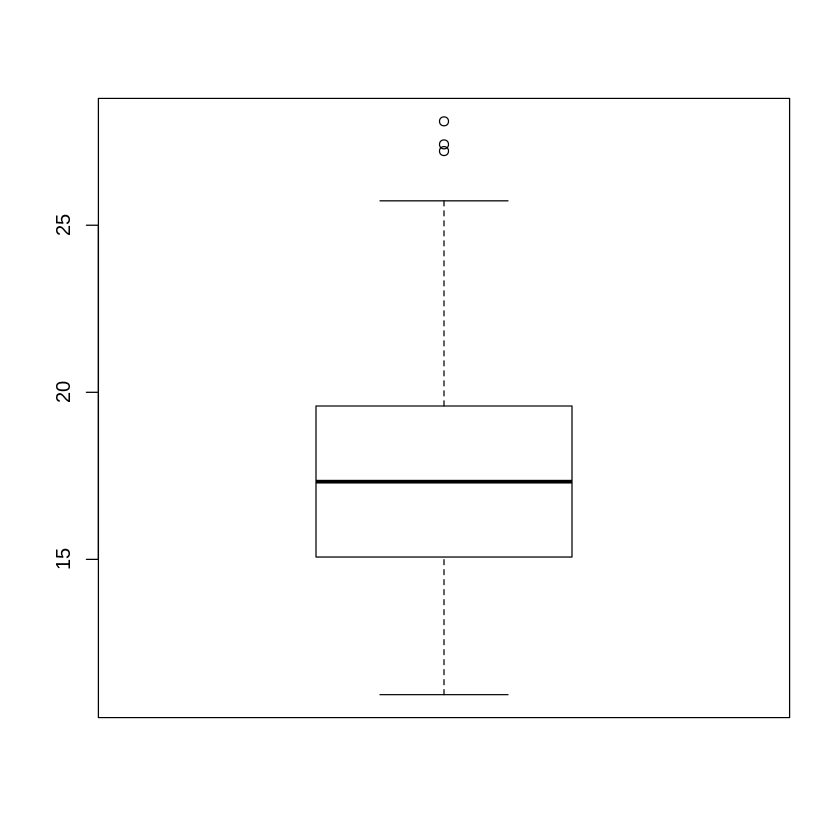

In [27]:
boxplot.stats(melignant$radius_mean)$out
boxplot(melignant$radius_mean)

In [28]:
healthy <- dplyr::filter(nas_cervical, diagnosis==0)
nrow(healthy)

[1] 357

[1]  6.981 16.840 17.850

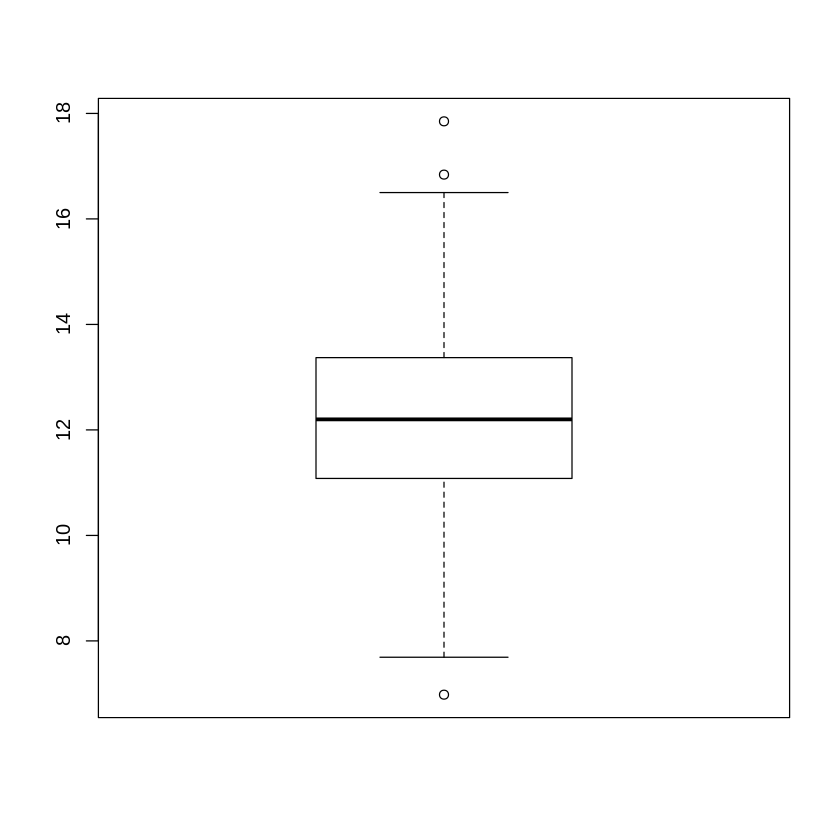

In [29]:
boxplot.stats(healthy$radius_mean)$out
boxplot(healthy$radius_mean)

can see that outliers have reduced and boxplots look more sensible. Cause for further investigation!

### Write to file

write your finished work to a new csv (replicability)

<hr>

# EDA aka the fun bit

Histograms, heatmaps maybe, some kind of graphical situation

In [30]:
# other things to ignore until visualisation becomes relevant 
# need to pull out col, stem and leaf

#stem(raw_cervical)
# hist()
# sort()
# max()